In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

In [4]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [8]:
df.isnull().sum()
# Drop rows with missing values
# df.dropna(inplace=True)
# df.info()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
##there is no null values in our chosen dataset
haveDisease = len(df[df.target == 1])
dontHaveDisease = len(df[df.target == 0])

print("{:.2f}% of patients have Heart Disease.".format((haveDisease / (len(df.target)) * 100)))
print("{:.2f}% of patients don't have Heart Disease.".format((dontHaveDisease / (len(df.target)) * 100)))


51.32% of patients have Heart Disease.
48.68% of patients don't have Heart Disease.


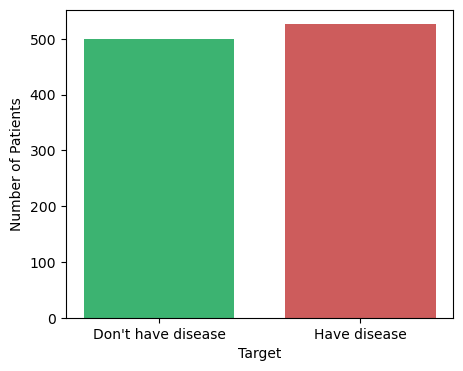

In [10]:
label = ["Don't have disease", "Have disease"]
value = (dontHaveDisease, haveDisease)

plt.subplots(figsize=(5, 4))
plt.bar(label, value, width=0.75, color=['mediumseagreen', 'indianred'])
plt.ylabel("Number of Patients")
plt.xlabel("Target")
plt.show()

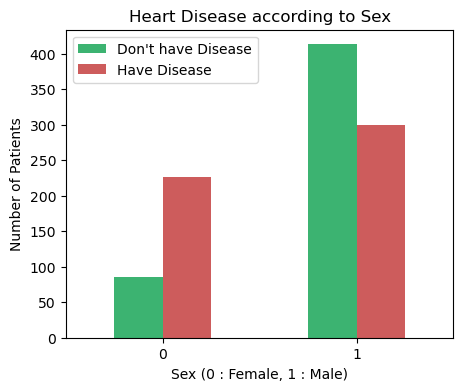

In [11]:
pd.crosstab(df.sex, df.target).plot(kind="bar", figsize=(5, 4), color=['mediumseagreen', 'indianred'])
plt.title('Heart Disease according to Sex')
plt.ylabel('Number of Patients')
plt.xlabel('Sex (0 : Female, 1 : Male)')
plt.legend(["Don't have Disease", "Have Disease"])
plt.xticks(rotation=0)
plt.show()

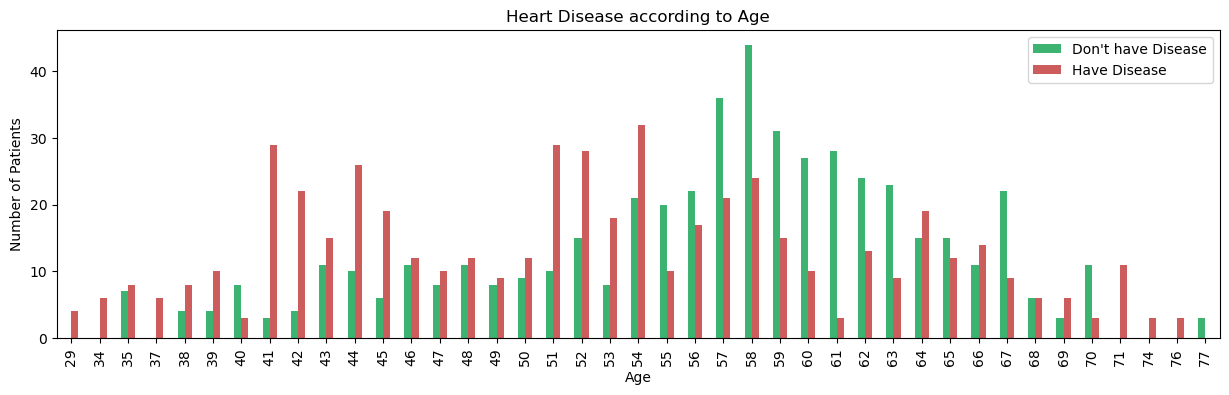

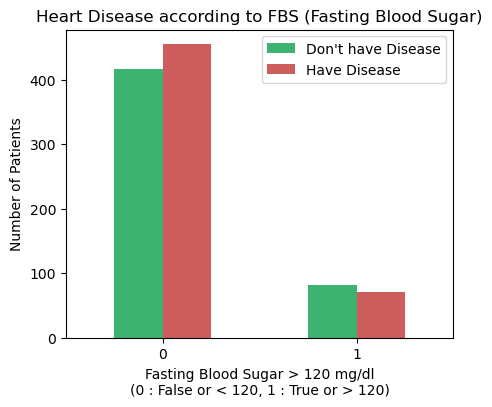

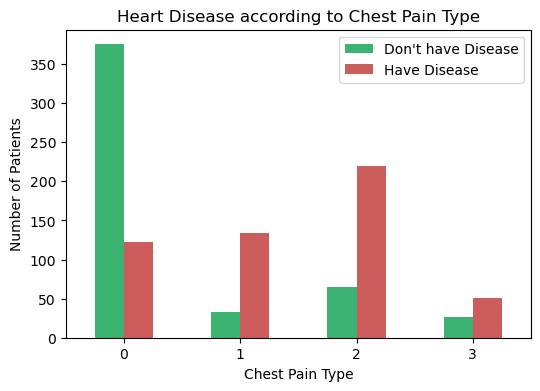

In [12]:
pd.crosstab(df.age, df.target).plot(kind="bar", figsize=(15, 4), color=['mediumseagreen', 'indianred'])
plt.title('Heart Disease according to Age')
plt.ylabel('Number of Patients')
plt.xlabel('Age')
plt.legend(["Don't have Disease", "Have Disease"])
plt.show()
pd.crosstab(df.fbs, df.target).plot(kind="bar", figsize=(5, 4), color=['mediumseagreen', 'indianred'])
plt.title('Heart Disease according to FBS (Fasting Blood Sugar)')
plt.ylabel('Number of Patients')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl\n(0 : False or < 120, 1 : True or > 120)')
plt.legend(["Don't have Disease", "Have Disease"])
plt.xticks(rotation=0)
plt.show()
#Types of chest pain are divided into 4 types: 0 - no chest pain, 1 - chest pain without being caused by the heart and blood vessels, 2 - chest pain which is caused by the heart and blood vessels, and 3 - unable to determine the cause of chest pain. As we can see, patients who have chest pain type 2 which is caused by the heart and blood vessels have been most diagnosed with heart disease.
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(6, 4), color=['mediumseagreen', 'indianred'])
plt.title('Heart Disease according to Chest Pain Type')
plt.ylabel('Number of Patients')
plt.xlabel('Chest Pain Type')
plt.legend(["Don't have Disease", "Have Disease"])
plt.xticks(rotation=0)
plt.show()

In [14]:
X = df.drop(['target'], axis=1)
y = df.target.values

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(768, 13) (257, 13) (768,) (257,)


In [17]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

print("Logistic Regression train score : {:.4f}".format(logreg.score(X_train, y_train)))
print("Logistic Regression test score : {:.4f}".format(logreg.score(X_test, y_test)))

Logistic Regression train score : 0.8542
Logistic Regression test score : 0.8638


<AxesSubplot:title={'center':'Logistic Regression'}>

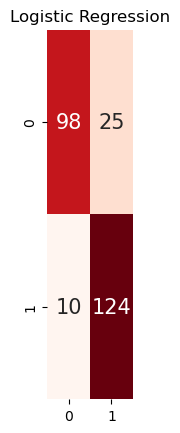

In [20]:
from sklearn.metrics import confusion_matrix
pred_logreg = logreg.predict(X_test)
cm_logreg = confusion_matrix(y_test, pred_logreg)
plt.subplot(1,5,2)
plt.title("Logistic Regression")
sns.heatmap(cm_logreg, annot=True, cmap="Reds", fmt="d", cbar=False, annot_kws={"size": 15})

In [23]:
#predicting using an input data
input_data = (52,1,0,215,212,0,1,168,0,1,2,2,3)

input_data_as_numpy_array= np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = logreg.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease
